#**Matplotlib Practise**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Basic Graph

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]


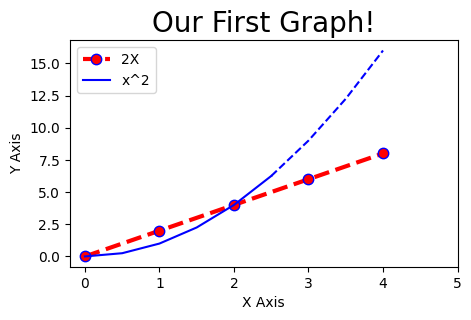

In [38]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# resizing graph
plt.figure(figsize=(5,3), dpi=100) # dpi is generally set to a big value to avoid pixelation of the graph

# ploting the points with line customizations
plt.plot(x,y, label='2X',color='red', linewidth=3, marker='.', linestyle='--', markersize=15, markeredgecolor='blue')

# giving title and label names to the graph
plt.title("Our First Graph!", fontdict = {'fontname': 'Arial', 'fontsize': 20})
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

# line two
x2= np.arange(0,4.5,0.5)
plt.plot(x2[:6], x2[:6]**2, 'b', label='x^2') # 'b' is a shorthand to specify properties of the line here 'b' represents blue
plt.plot(x2[5:], x2[5:]**2, 'b--')
print(x2)

# scales for x and y axis (optional if you dont want any decimals)
plt.xticks([0,1,2,3,4,5])
# plt.yticks([0,2,4,6,8])

# giving legend
plt.legend()

# saving the graph as a png
plt.savefig('firstGraph.png', dpi=300)

plt.show()

## Bar Chart

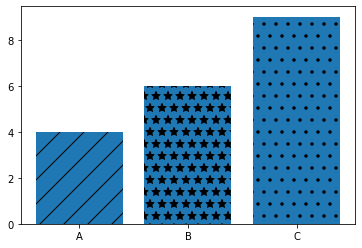

In [47]:
labels = ['A', 'B', 'C']
values = [4,6,9]

# plotting the bar graph and assigning it to a variable bars
bars = plt.bar(labels, values)

# setting bar patterns
patterns = ['/', '*', '.']
for bar in bars:
  bar.set_hatch(patterns.pop(0))

# alternative way to set patterns
# bars[0].set_hatch('/')
# bars[1].set_hatch('*')
# bars[2].set_hatch('.')

plt.show()

## Line Chart (Gas Prices Eg.)

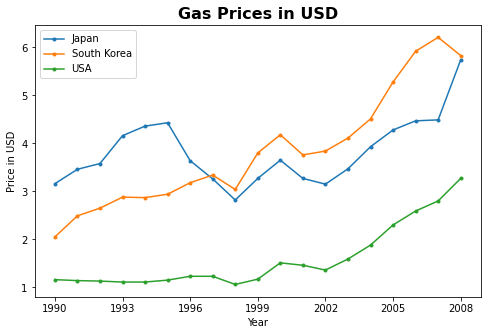

In [69]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

# giving titles and labels
plt.title('Gas Prices in USD', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.xlabel('Year')
plt.ylabel('Price in USD')

# plt.plot(gas.Year, gas.USA, 'b.-', label='USA')
# plt.plot(gas.Year, gas['South Korea'], 'g.-', label='South Korea')
# plt.plot(gas.Year, gas.Japan, 'r.-', label='Japan')

# alternative way to plot
countries_to_look_at = ['USA', 'South Korea', 'Japan']
for country in gas:
  if country in countries_to_look_at:
    plt.plot(gas.Year, gas[country], '.-', label=country)

# scaling the x axis
plt.xticks(gas.Year[::3])

# giving legend
plt.legend()

# saving figure
plt.savefig('gasprices.png', dpi=300)

plt.show()

## Loading Fifa Dataset

In [72]:
fifa = pd.read_csv('fifa_data.csv')

print(fifa.head(5))

   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   

## Histogram

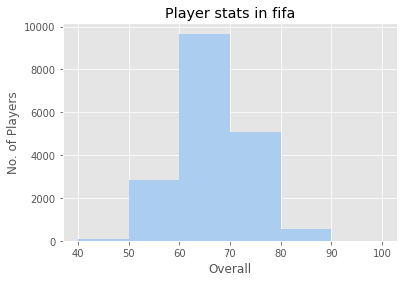

In [116]:
bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color="#abcdef")

plt.title('Player stats in fifa')
plt.xlabel('Overall')
plt.ylabel('No. of Players')

plt.savefig('fifa_histogram.png', dpi=300)

plt.show()

## Pie Chart (Preffered Foot eg.)

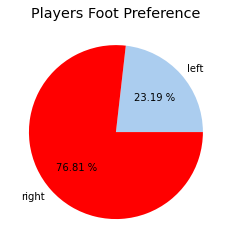

In [117]:
# print(fifa.columns)

# using .loc[] function to conditionally filter out certain values and counting them using the count() method
left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]

# print(left, right)

labels = ['left', 'right']
colors = ['#abcdef', 'red']

# plotting the pie chart using the values , labels and colors
# autopct is used to show the percentage int the chart, %.2f is to show the percentage upto 2 decimal places, and %% is used to show the % sign after the percentage value
plt.pie([left, right], labels=labels, colors=colors, autopct='%.2f %%')

plt.title('Players Foot Preference')

plt.savefig('fifa_pie-1.png', dpi=300)

plt.show()

## Pie Chart (Player Weight eg.)

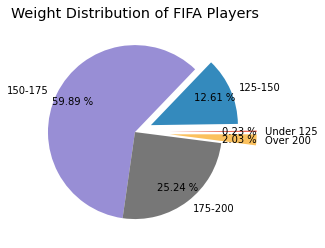

In [118]:
# print(fifa.Weight)

fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

# print(fifa.Weight)

# used to change style / colouring of the pie chart
plt.style.use('ggplot')

# defining various conditions to plot the pie chart
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight <200)].count()[0]
heavy = fifa.loc[(fifa.Weight >= 200)].count()[0]

# adding this condition to the list
weights = [light, light_medium, medium, medium_heavy, heavy]

# adding labels
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']

# explode property kind of cuts out / explodes that part of the pie chart for a clear view
explode= (.4,.2,0,0,.4) 

# title of the pie chart
plt.title('Weight Distribution of FIFA Players')

# plotting the pie chart using the condition list, labels and autopct
# pctdistance is distance of the percentage symbols from the center of the pie chart
plt.pie(weights, labels=labels, autopct='%.2f %%', pctdistance=0.8, explode=explode)

plt.savefig('fifa_pie-2.png', dpi=300)

plt.show()

## Box Plot

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


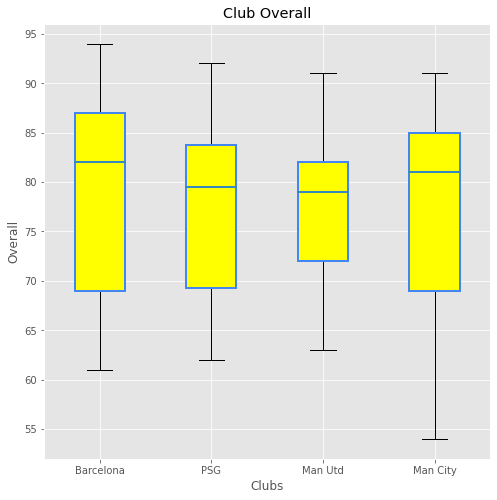

In [119]:
# print(fifa.Club)

plt.figure(figsize = (8,8))

# getting overall value based on the club name
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
psg = fifa.loc[fifa.Club == 'Paris Saint-Germain']['Overall']
manutd = fifa.loc[fifa.Club == 'Manchester United']['Overall']
city = fifa.loc[fifa.Club == 'Manchester City']['Overall']

# setting labels
labels = ['Barcelona', 'PSG', 'Man Utd', 'Man City']

# plotting the boxplot, medianprops is used to style the median blue horizontal line, patch_artist=True is needed to set the facecolor further
boxes = plt.boxplot([barcelona, psg, manutd, city], labels=labels, patch_artist=True, medianprops={'linewidth':2})
for box in boxes ['boxes']:
  # Set edge color
  box.set(color='#4286f4', linewidth=2)
  #Change Fill Color
  box.set(facecolor='yellow')

# giving title and labels
plt.title("Club Overall")

plt.xlabel('Clubs')
plt.ylabel('Overall')

plt.savefig('fifa_boxplot.png', dpi=300)

plt.show()